In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import csv

/Users/thomasbourke/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fractal_data = pd.DataFrame(pd.read_csv("data/task1.csv", dtype=np.float64))


endNum = 100

# want to seperate data into seperate runs
chunk_size = endNum

#object to store data
runs = []

#seperates data from csv into individual objects
for i in range(0, len(fractal_data), chunk_size):
    run = fractal_data.iloc[i:i+chunk_size]
    runs.append(run)


In [3]:
#create line of best fits to calculate gradient

def best_fit(x, slope , intercept):
    return slope*x + intercept


/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_4808/137268572.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


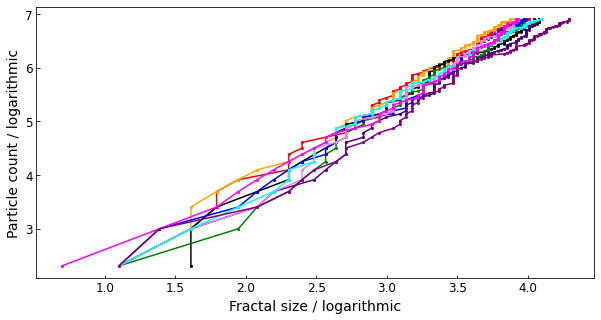

In [4]:
#plotting

fig, ax = plt.subplots(figsize=(10,5))  

#colours for figure
colors = ["red", "orange", "black", "green", "blue", "indigo", "violet", "cyan", "magenta", "purple"]


fractal_dim = []
   
      
for i in range(0, len(runs)):
               #len(runs)):
    temp = pd.DataFrame(runs[i])
    
    #creating log of data
    temp['ln_numParticles'] = np.log(temp['numParticles'])
    temp['ln_clusterSize'] = np.log(temp['clusterRadius'])
    
    #calculating fractal dimension
    popt, pcov = curve_fit(best_fit, temp['ln_clusterSize'], temp['ln_numParticles'])
    m = popt[0]    
    fractal_dim.append(m)
    
    #graph formatting
    ax.set_xlabel("Fractal size / logarithmic", fontsize=14)
    ax.set_ylabel("Particle count / logarithmic", fontsize=14)
    plt.xticks(fontsize=12)                 
    plt.yticks(fontsize=12) 
    plt.tick_params(axis='both', direction='in') 
    
    #plots graph
    ax.plot(temp['ln_clusterSize'], temp['ln_numParticles'],  ls='-', marker='o', color=colors[i], markersize='2')

#saving fractal dimension to csv file
fractal_dim_data = 'data/fractal_dim.csv'
with open(fractal_dim_data, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["fractal_dim"])
    writer.writerows(map(lambda x: [x], fractal_dim))

fig.show()
fig.savefig('figures/figure1.png')

    

In [ ]:
#plot logarithm of fractal dimensions